### In this notebook we will make a pytorch model and change it to MDF format and see the output using netron


create a PyTorch model for the **Titanic: Machine Learning from Disaster** dataset from Kaggle, which is a classic **binary classification problem of predicting survival on the Titanic based on various features of the passengers**.

First, download the dataset from Kaggle name train.csv in the same folder

### Importing the required libraries

In [57]:
import torch
import torch.nn as nn
import numpy
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

### Load and preprocess the data

In [16]:
data = pd.read_csv('train.csv')
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data = data.fillna(data.mean())

In [20]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0




### Split the data into training and validation sets

In [4]:

X_train, X_val, y_train, y_val = train_test_split(data.drop('Survived', axis=1).values,
                                                  data['Survived'].values,
                                                  test_size=0.2,
                                                  random_state=42)

### In this X_train we have all row and columns(except survived column) values in the form of 2D array 

In [11]:
X_train[0]#This show the random split from the data with passenger Id=332 

array([332. ,   1. ,  45.5,   0. ,   0. ,  28.5,   1. ,   0. ,   1. ])

### Define the model architecture

In [5]:
class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.fc1 = nn.Linear(9, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x

model = TitanicModel()

### Define the loss function and optimizer

In [6]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

### Train the model

In [47]:
epochs = 200
for epoch in range(epochs):
    running_loss = 0.0
    inputs = torch.tensor(X_train, dtype=torch.float32)#It changes the X_train array into a datatype of float32 and change it to a tensor
    labels = torch.tensor(y_train, dtype=torch.float32)#It changes the y_train array into tensor with datatype of float32
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs.squeeze(), labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    train_loss = running_loss / X_train.shape[0]
    with torch.no_grad():
        val_inputs = torch.tensor(X_val, dtype=torch.float32)
        val_labels = torch.tensor(y_val, dtype=torch.float32)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs.squeeze(), val_labels).item()
        val_acc = ((val_outputs >= 0.5).squeeze().float() == val_labels).float().mean().item()
        
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')      

Epoch 1/200, Train Loss: 0.0008, Val Loss: 0.5716, Val Acc: 0.7207
Epoch 2/200, Train Loss: 0.0008, Val Loss: 0.5715, Val Acc: 0.7207
Epoch 3/200, Train Loss: 0.0008, Val Loss: 0.5714, Val Acc: 0.7207
Epoch 4/200, Train Loss: 0.0008, Val Loss: 0.5713, Val Acc: 0.7207
Epoch 5/200, Train Loss: 0.0008, Val Loss: 0.5712, Val Acc: 0.7207
Epoch 6/200, Train Loss: 0.0008, Val Loss: 0.5711, Val Acc: 0.7207
Epoch 7/200, Train Loss: 0.0008, Val Loss: 0.5709, Val Acc: 0.7207
Epoch 8/200, Train Loss: 0.0008, Val Loss: 0.5708, Val Acc: 0.7207
Epoch 9/200, Train Loss: 0.0008, Val Loss: 0.5707, Val Acc: 0.7207
Epoch 10/200, Train Loss: 0.0008, Val Loss: 0.5706, Val Acc: 0.7207
Epoch 11/200, Train Loss: 0.0008, Val Loss: 0.5705, Val Acc: 0.7207
Epoch 12/200, Train Loss: 0.0008, Val Loss: 0.5704, Val Acc: 0.7207
Epoch 13/200, Train Loss: 0.0008, Val Loss: 0.5703, Val Acc: 0.7207
Epoch 14/200, Train Loss: 0.0008, Val Loss: 0.5702, Val Acc: 0.7207
Epoch 15/200, Train Loss: 0.0008, Val Loss: 0.5701, Val A

### Output from the Model 
We will use tensor.round() for getting the probability

In [48]:
inputs#It is set of tensor which is basically X_train data in the form of tensor and datatype float32

tensor([[332.0000,   1.0000,  45.5000,  ...,   1.0000,   0.0000,   1.0000],
        [734.0000,   2.0000,  23.0000,  ...,   1.0000,   0.0000,   1.0000],
        [383.0000,   3.0000,  32.0000,  ...,   1.0000,   0.0000,   1.0000],
        ...,
        [861.0000,   3.0000,  41.0000,  ...,   1.0000,   0.0000,   1.0000],
        [436.0000,   1.0000,  14.0000,  ...,   0.0000,   0.0000,   1.0000],
        [103.0000,   1.0000,  21.0000,  ...,   1.0000,   0.0000,   1.0000]])

### Outputs In terms of Probability

In [49]:
outputs#Basically it is the proability of the survival we have to use torch.round function to see it in binary

tensor([[0.3582],
        [0.3450],
        [0.2101],
        [0.2434],
        [0.4001],
        [0.8481],
        [0.3938],
        [0.2660],
        [0.1661],
        [0.3368],
        [0.5177],
        [0.2484],
        [0.2495],
        [0.2503],
        [0.1753],
        [0.4129],
        [0.7044],
        [0.9337],
        [0.3489],
        [0.6892],
        [0.3427],
        [0.1832],
        [0.3748],
        [0.5003],
        [0.3403],
        [0.2537],
        [0.3700],
        [0.2657],
        [0.5971],
        [0.2220],
        [0.2137],
        [0.8134],
        [0.2076],
        [0.7357],
        [0.2620],
        [0.3185],
        [0.1519],
        [0.4881],
        [0.3745],
        [0.5647],
        [0.2162],
        [0.1746],
        [0.3952],
        [0.2257],
        [0.3702],
        [0.2918],
        [0.3921],
        [0.2293],
        [0.6931],
        [0.4311],
        [0.2781],
        [0.2759],
        [0.9458],
        [0.2297],
        [0.3149],
        [0

### Round of Outputs

In [50]:
Probabilty=torch.round(outputs)# survival of all the passengers in the X_train
Probabilty

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [51]:
correct=0

for i,j in zip(y_train,Probabilty):#Checking number of correct value in the prediction set
    if(torch.tensor(i)==j):
        correct+=1
print((correct/len(y_train))*100)#Accuracy function for the model it is pretty much low we can change it by adding more laye and filters

72.3314606741573


### Importing required model for generatig the graph and changing the model from pytorch to mdf

In [52]:
from modeci_mdf.execution_engine import EvaluableGraph
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
model.eval()

TitanicModel(
  (fc1): Linear(in_features=9, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

**[pytorch_to_mdf()](https://mdf.readthedocs.io/en/latest/api/export_format/PyTorch/PyTorch.html#pytorch-to-mdf)** function with the following arguments:
Requires some arguement such as **model** , **arg**, **trace**

pytorch_to_mdf(
      model: The model to translate into MDF.
      args: The input arguments for this model. If a nn.Module is passed then the model will be traced with these
          inputs. If a ScriptModule is passed, they are still needed to deterimine input shapes.
      trace: Force the use of tracing to compile the model. The default is to use torch.jit.script
      use_onnx_ops: Use ONNX ops when possible, fallback to ATEN ops when not available. Default is True. If False,
          use only ATEN ops.
)

### Model from PyTorch to MDF

In [53]:
mdf_model, params_dict = pytorch_to_mdf(
        model=model, #model of pytorch
        args=inputs,# input arguments used to trace the PyTorch model's  
        trace=True,
    )

### Export the MDF model in json format

In [54]:
mdf_model.to_json_file("Machine Learning workflows using MDF_Pytorch_to_MDF.json")

'Machine Learning workflows using MDF_Pytorch_to_MDF.json'

### Export the MDF model in yaml format

In [55]:
mdf_model.to_yaml_file("Machine Learning workflows using MDF_Pytorch_to_MDF.yaml")

'Machine Learning workflows using MDF_Pytorch_to_MDF.yaml'

In [58]:
# This code performs the following steps:

# 1.First we store a mdf_model graph in mdf_graph
# 2.Pass the input to params _dict which is weights and biases of the converted PyTorch model
# 3.Generate the evaluation graph for getting the output
# 4. Here in output_mdf here it is the output of the input value
# 5.Here we are rounding of the value from the numpy array of name Output_mdf by the help of round()

mdf_graph = mdf_model.graphs[0]

# Add the input data to the params_dict dictionary
params_dict["input1"] = inputs.detach().numpy()

eg = EvaluableGraph(graph=mdf_graph, verbose=False)

eg.evaluate(initializer=params_dict)
#Getting the output from the mdf_model
output_mdf = eg.output_enodes[0].get_output()



Init graph: TitanicModelGraph
Evaluating graph: TitanicModelGraph, root nodes: ['Gemm_3'], with array format numpy


### Output from mdf

In [62]:
output_mdf=torch.tensor(output_mdf, dtype=torch.float32)#changing the datatype from float 64 to float 32 and array to tensor
output_mdf

C:\Users\Rishikesh Maurya\AppData\Local\Temp\ipykernel_21348\820562554.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output_mdf=torch.tensor(output_mdf, dtype=torch.float32)#changing the datatype from float 64 to float 32 and array to tensor


tensor([[0.3581],
        [0.3449],
        [0.2101],
        [0.2433],
        [0.4002],
        [0.8481],
        [0.3936],
        [0.2659],
        [0.1661],
        [0.3367],
        [0.5178],
        [0.2483],
        [0.2494],
        [0.2502],
        [0.1753],
        [0.4131],
        [0.7044],
        [0.9337],
        [0.3488],
        [0.6892],
        [0.3428],
        [0.1832],
        [0.3749],
        [0.5007],
        [0.3404],
        [0.2537],
        [0.3703],
        [0.2656],
        [0.5971],
        [0.2220],
        [0.2136],
        [0.8135],
        [0.2076],
        [0.7358],
        [0.2621],
        [0.3186],
        [0.1518],
        [0.4883],
        [0.3745],
        [0.5649],
        [0.2162],
        [0.1746],
        [0.3953],
        [0.2257],
        [0.3701],
        [0.2917],
        [0.3924],
        [0.2292],
        [0.6931],
        [0.4312],
        [0.2782],
        [0.2757],
        [0.9458],
        [0.2297],
        [0.3151],
        [0

In [75]:
#Getting the probability from the mdf_model using torch.round()
Probability_of_survival_mdf = numpy.round(output_mdf)
Probability_of_survival_mdf

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

### Camparison of MDF and Pytorch Outputs

In [79]:
Correct_mdf=0

for i,j in zip(Probability_of_survival_mdf,Probabilty):#Checking number of correct value in the prediction set
    if(i==j):
        Correct_mdf+=1
print((Correct_mdf/len(y_train))*100)#It will show How much % same the mdf and PyTorch model showing the same output

100.0


## 2. Generate a graph image from the model <a class="anchor" id="h2"></a>

We will use the [to_graph_image](https://mdf.readthedocs.io/en/latest/api/_autosummary/modeci_mdf.mdf.Model.html?highlight=to%20graph%20image#modeci_mdf.mdf.Model.to_graph_image) method on the model to generate an image representing the structure of the graph.


Converting MDF graph: TitanicModelGraph to graphviz (level: 1, format: png)
    Node: Gemm_3
    Node: Sigmoid_4
    Edge: Gemm_3_Sigmoid_4 connects Gemm_3 to Sigmoid_4
Written graph image to: Machine Learning workflows using MDF_Pytorch_to_MDF.png


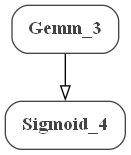

In [80]:
# This code generates a visual representation of the computational graph of the MDF model, using the to_graph_image() method of the mdf_model object. The generated image is saved as a PNG file with the given filename_root, and if view_on_render is True, the image is displayed using the default image viewer. The parameters engine, output_format, only_warn_on_fail, and is_horizontal control various aspects of the image generation, such as the layout engine to use, the output format, whether to show only warnings on failure, and the orientation of the graph.

# The second part of the code uses the Image function from the IPython.display module to display the generated image in the Jupyter notebook, assuming that the file has been saved to the current directory.

mdf_model.to_graph_image(
    engine="dot",
    output_format="png",
    view_on_render=False,
    level=1,
    filename_root="Machine Learning workflows using MDF_Pytorch_to_MDF",#file root name
    only_warn_on_fail=True,
    is_horizontal = False
)
from IPython.display import Image
Image(filename="Machine Learning workflows using MDF_Pytorch_to_MDF.png")# saving the file

Check the out using Netron

In [81]:
#display an image of an ONNX graph in the Jupyter notebook using the IPython.display module. The image file is loaded using the Image function and is displayed using the display function.

# If image file does not exist, the code uses the torch.onnx.export method to convert the PyTorch model to an ONNX model and saves it as "Machine Learning workflows using MDF_Pytorch_to_MDF.onnx" file. The netron.start method is then called to open a web-based visualization tool called Netron that allows users to visualize and explore the ONNX model.

try:
    from IPython.display import Image
    onnx_graph = Image(filename="Machine Learning workflows using MDF_Pytorch_to_MDF.onnx.png")
    display(onnx_graph)
    
except:
    import netron
    torch.onnx.export(
            model,
            inputs,
            "Machine Learning workflows using MDF_Pytorch_to_MDF.onnx",
            verbose=True,
            input_names=[],
            opset_version=9,
        )
    netron.start("Machine Learning workflows using MDF_Pytorch_to_MDF.onnx")

graph(%0 : Float(712, 9, strides=[9, 1], requires_grad=0, device=cpu),
      %fc1.weight : Float(1, 9, strides=[9, 1], requires_grad=1, device=cpu),
      %fc1.bias : Float(1, strides=[1], requires_grad=1, device=cpu)):
  %3 : Float(712, 1, strides=[1, 1], requires_grad=1, device=cpu) = onnx::Gemm[alpha=1., beta=1., transB=1](%0, %fc1.weight, %fc1.bias) # C:\Users\Rishikesh Maurya\MDF_3.9\.vir3.9.13\lib\site-packages\torch\nn\modules\linear.py:103:0
  %4 : Float(712, 1, strides=[1, 1], requires_grad=1, device=cpu) = onnx::Sigmoid(%3) # C:\Users\Rishikesh Maurya\MDF_3.9\.vir3.9.13\lib\site-packages\torch\nn\modules\activation.py:293:0
  return (%4)

Serving 'Machine Learning workflows using MDF_Pytorch_to_MDF.onnx' at http://localhost:8080


# Generating a model in PyTorch
In this using a **pretrained**(ResNet18 model) a model then generating a outputs from the **pyTorch model** then comparing that with the **mdf_model**

In [82]:
import torchvision.transforms as transforms
from torchvision import transforms
from torchvision.io import read_image
import torch
from PIL import Image
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

### Preprocessing the input image 

In [110]:
# Load the input images
image1 = Image.open('fish.jpg')
image2 = Image.open('bucket.jpeg')

# Preprocess the input images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor1 = preprocess(image1)
input_tensor2 = preprocess(image2)
input_batch = torch.stack([input_tensor1, input_tensor2])

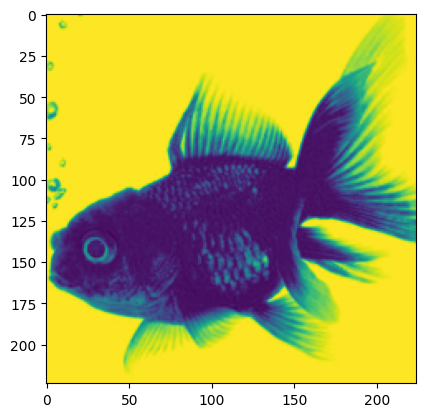

In [112]:
plt.imshow(input_tensor1[2]);


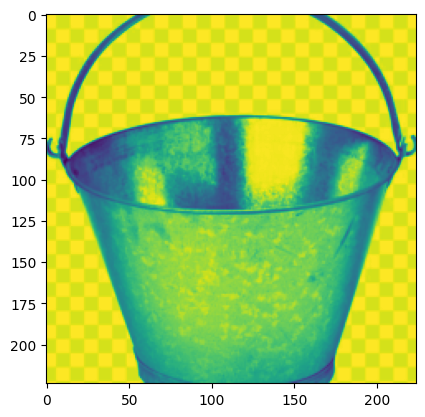

In [111]:
plt.imshow(input_tensor2[2]);

### Load pretrained ResNet18 model

In [113]:
# Move the input tensor to the GPU if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')

# Instantiate the pre-trained ResNet18 model
model_resnet = models.resnet18(pretrained=True)

# Disable gradient calculation to save memory
with torch.no_grad():
    # Forward pass through the model
    output = model_resnet(input_batch)

In [143]:
# Compute the predicted class indices using argmax
predicted_indices = output.argmax(dim=1)
predicted_indices

tensor([  1, 463])

## Getting the index of the maximum probability

In [155]:
# Define a list of class labels for ImageNet
class_labels = np.loadtxt("imagenet_classes.txt", str, delimiter='\n')
# manually created the file in the corrent folder from the and data taken from the [Resnet18 website]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


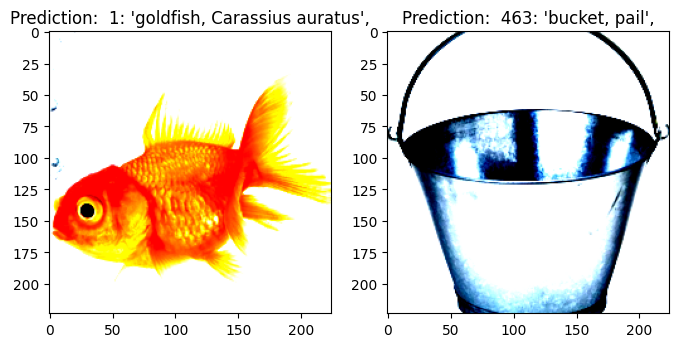

In [116]:
# Visualize the input images and predictions
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(np.transpose(input_tensor1.cpu().numpy(), (1, 2, 0)))
ax[0].set_title(f"Prediction: {class_labels[predicted_indices[0]]}")
ax[1].imshow(np.transpose(input_tensor2.cpu().numpy(), (1, 2, 0)))
ax[1].set_title(f"Prediction: {class_labels[predicted_indices[1]]}")
plt.show()

### Convert PyTorch model to MDF 

In [117]:
from modeci_mdf.execution_engine import EvaluableGraph
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
mdf_model_resnet, params_dict = pytorch_to_mdf(
        model=model_resnet,
        args=input_batch,#two batch of images
        trace=True,
    )

C:\Users\Rishikesh Maurya\MDF_3.9\.vir3.9.13\lib\site-packages\torch\onnx\symbolic_helper.py:773: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to training  mode. The operators will be exported in training , as specified by the functional operator.
  warnings.warn("ONNX export mode is set to " + training_mode +


### Passing Input through MDF model

In [144]:
mdf_graph_resnet = mdf_model_resnet.graphs[0]
params_dict["input1"] = input_batch.detach().numpy()#we have pass two photos with the help of stack

eg = EvaluableGraph(graph=mdf_graph_resnet, verbose=False)

eg.evaluate(initializer=params_dict)

output_mdf_resnet = eg.output_enodes[0].get_output()
output_mdf_resnet=torch.tensor(output_mdf_resnet)#changing the value from the Array to tensors


Init graph: ResNetGraph
Evaluating graph: ResNetGraph, root nodes: ['Conv_123'], with array format numpy


### MDF OUTPUT
It is same as the output getting from the Pytorch model

In [148]:
output_mdf_resnet

tensor([[ 1.0793,  5.1313,  0.2213,  ...,  1.9953,  4.0485,  1.0893],
        [-2.3975, -6.1278, -1.4280,  ..., -3.3802, -1.6341,  1.0286]],
       dtype=torch.float64)

In [149]:
predicted_indices_mdf = output_mdf_resnet.argmax(dim=1)
predicted_indices_mdf

tensor([  1, 463])

### Output is same in MDF and PyTorch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


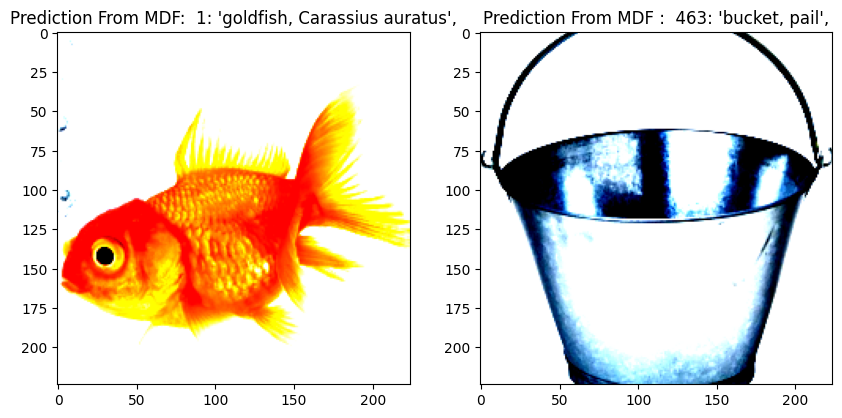

In [152]:
# Visualize the input images and predictions
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(np.transpose(input_tensor1.cpu().numpy(), (1, 2, 0)))
ax[0].set_title(f"Prediction From MDF: {class_labels[predicted_indices_mdf[0]]}")
ax[1].imshow(np.transpose(input_tensor2.cpu().numpy(), (1, 2, 0)))
ax[1].set_title(f"Prediction From MDF : {class_labels[predicted_indices_mdf[1]]}")
plt.show()

### MDF Graph

Converting MDF graph: ResNetGraph to graphviz (level: 1, format: png)
    Node: Conv_123
    Node: BatchNormalization_124_125_126
    Node: Relu_127
    Node: MaxPool_128
    Node: Conv_129
    Node: BatchNormalization_130_131_132
    Node: Relu_133
    Node: Conv_134
    Node: BatchNormalization_135_136_137
    Node: Add_138
    Node: Relu_139
    Node: Conv_140
    Node: BatchNormalization_141_142_143
    Node: Relu_144
    Node: Conv_145
    Node: BatchNormalization_146_147_148
    Node: Add_149
    Node: Relu_150
    Node: Conv_151
    Node: BatchNormalization_152_153_154
    Node: Relu_155
    Node: Conv_156
    Node: BatchNormalization_157_158_159
    Node: Conv_160
    Node: BatchNormalization_161_162_163
    Node: Add_164
    Node: Relu_165
    Node: Conv_166
    Node: BatchNormalization_167_168_169
    Node: Relu_170
    Node: Conv_171
    Node: BatchNormalization_172_173_174
    Node: Add_175
    Node: Relu_176
    Node: Conv_177
    Node: BatchNormalization_178_179_180
    N

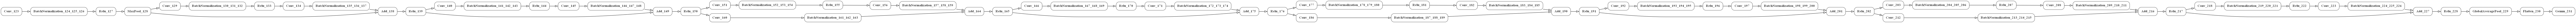

In [153]:
mdf_model_resnet.to_graph_image(
    engine="dot",
    output_format="png",
    view_on_render=False,
    level=1,
    filename_root="Resnet18",
    only_warn_on_fail=True,
    is_horizontal = True
)
from IPython.display import Image
Image(filename="Resnet18.png")

### ONNX Graph

In [154]:
try:
    from IPython.display import Image
    onnx_graph = Image(filename="Resnet.onnx.png")
    display(onnx_graph)
    
except:
    import netron
    torch.onnx.export(
            model_resnet,
            input_batch,
            "Resnet.onnx",
            verbose=True,
            input_names=[],
            opset_version=9,
        )
    netron.start("Resnet.onnx")


graph(%input.1 : Float(2, 3, 224, 224, strides=[150528, 50176, 224, 1], requires_grad=0, device=cpu),
      %fc.weight : Float(1000, 512, strides=[512, 1], requires_grad=1, device=cpu),
      %fc.bias : Float(1000, strides=[1], requires_grad=1, device=cpu),
      %193 : Float(64, 3, 7, 7, strides=[147, 49, 7, 1], requires_grad=0, device=cpu),
      %194 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %196 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %197 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %199 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %200 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %202 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %203 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %205 : Float(64, 64, 3, 3, strides=[576, 9, 3, 1], requires_grad=0, device=cpu),
      %206 : Float(64, strides=[1], require